# Homework #6

Winter 2025 - UCLA, Student: Budhaditya De, UCLA ID: 206182210

### Introduction

In this homework, a python script is developed using functions for carrying out predictions of the molar concentrations of Ethane (C2) in an LNG production powerplant. Given the raw data consisting of feature variables as LNG temperature and C2 temperature downstream, we are tasked with predicting the concentrations of C2 against some of its observed values from the plant recordings. We would be training and fitting multiple machine learning regression models for this job and find out the optimal choice of hyperparameters to give us the best prediction possible using the provided datasets.

In [2]:
%load_ext autoreload
%autoreload 2
%reset -f

## Task 

1.) First, the raw data was cleaned and preprocessed. In this, the 'unnamed' column was dropped, the 'timestamp' column was indexed and converted to datetime datatype. Next the NaNs were forward filled. For this study, since there are only two features, we are not doing the feature reduction step based on COV and correlation. 

In [3]:
import hw6
import numpy as np
import pandas as pd

df = pd.read_csv("LNG_C2_Raw_Data.csv")

In [4]:
import hw6
df_clean = hw6.preprocess(df)

2.) After cleaning, the features and target variable were plotted against the index for visualization. Scatter and box plots were used for visualization. From Fig. 1, it can be seen that LNG temperature and C2 molar concentrations fluctuate a lot more compared to C2 temperature which is comparatively stable, however, there are some steep spikes observed particularly towards the end of the observed period. Following the box plots in Fig.2, we can conclude that for LNG temp. the distribution is centered around 34°C, with a few outliers on the lower end (~28°C). For C2 temp.,the median temperature is around 70°C, but there are many outliers on the higher side, with values exceeding 85°C, indicating potential anomalies or sudden process fluctuations. For C2 molar concentration, the distribution is centered around 13%, with a relatively wider interquartile range.

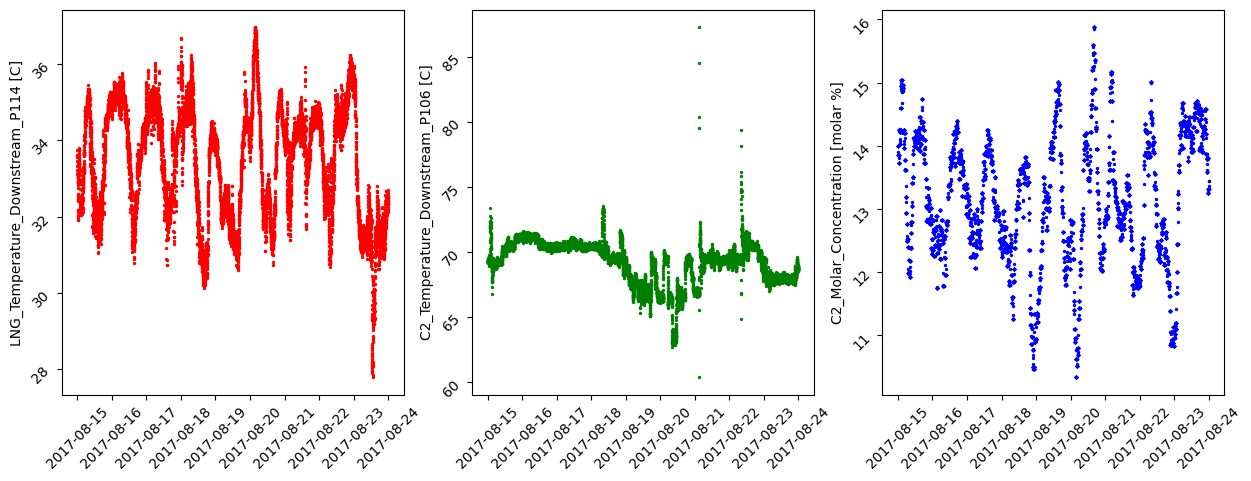

In [5]:
hw6.plotting_scatter(df_clean)

Fig.1: Scatter plots for sensor data features and target variable (i.e. C2_molar conc.) against recorded timestamps

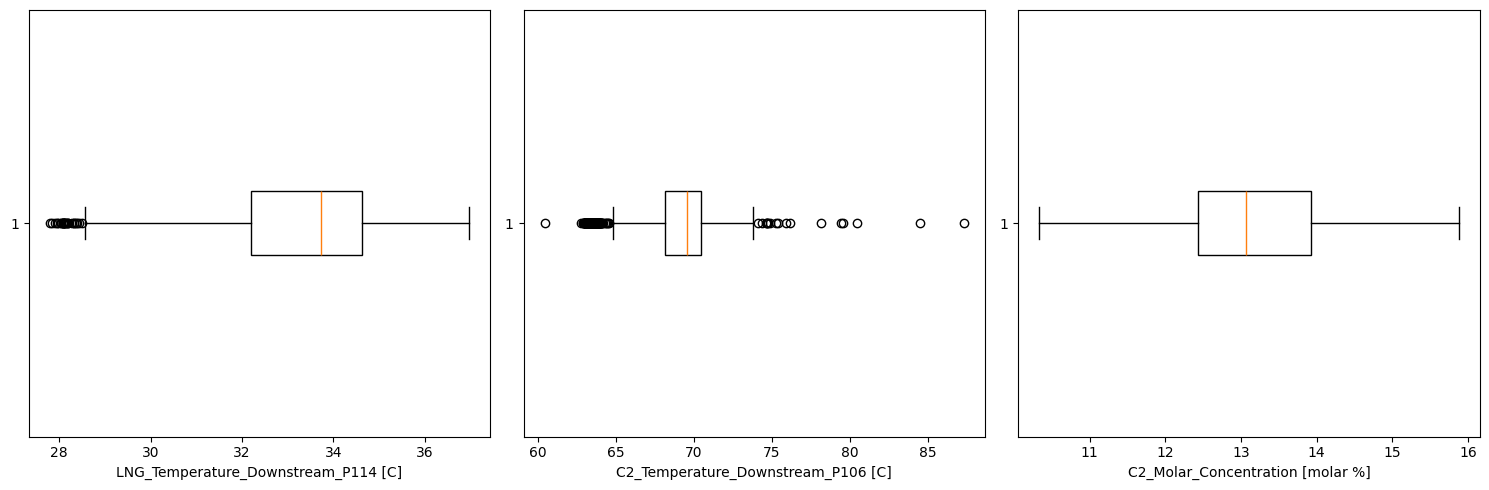

In [6]:
hw6.plotting_boxplots(df_clean)

Fig.2: Box plots for sensor data features and target variable (i.e. C2_molar conc.) against recorded timestamps

3.) Now for developing ML regressors, first manual selection and tuning of hyperparameters is conducted in part 3. To systematically select and combine the hyperparameters for each model, lists with potential values for all parameters were initialized from usual judgement and the ML models were trained and tested against each and every parameter combination in a loop and the best combination of parameters which resulted in the highest value of R^2 on the test set was chosen.

 First we split the dataframe into train and test sets and then normalize.

In [7]:
x_train,x_test,y_train,y_test = hw6.train_test_splitting(df_clean)

3.a) Linear Support Vector Regressor (LSVR): For the first case, the hyperparameters chosen were 'c' and 'epsilon' with values ranging between [0.1, 1, 10] for 'c' and [0, 0.1, 0.3, 0.5, 1.5] for epsilon. The loss metric was held constant as 'squared_epsilon_insensitive' for all cases since it used L2 norm for computing the losses and is thus better compared to L1 based 'epsilon_insensitive'. As evident from the results, the linear SVR doesnt perform well even with the best set of parameters.


Best Hyperparameters:
C=10, epsilon=0.5, Best MSE=0.4029, Best RMSE=0.6347, Best R²=0.6042


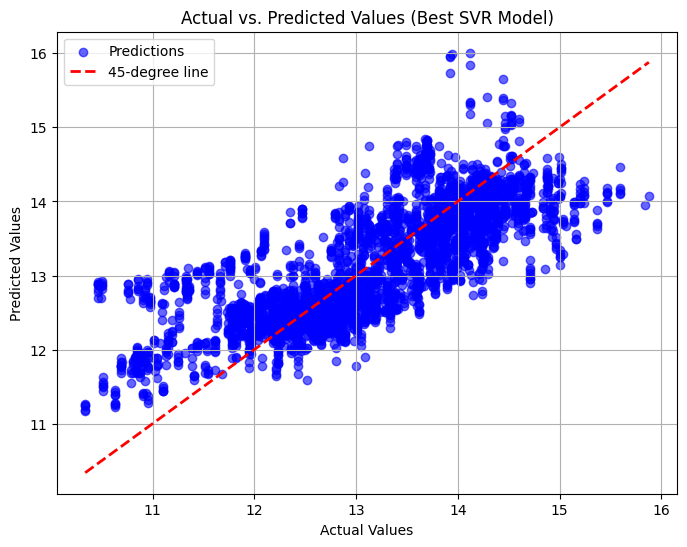

In [9]:
best_comb_LSVR = hw6.linear_SVR(x_train,x_test,y_train,y_test)

Fig.3: Actual vs Predicted C2 concentrations using Linear SVR for the best hyperparameter combinations (c = 10, epsilon = 0.5 and loss = squred_epsilon_insensitive)

3.b) Nonlinear Support Vector Regressor (NLSVR): For this case the hyperparameters chosen were 'c' ranging [0.1, 0.5, 1, 10, 20], 'epsilon' ranging [0.1, 0.3, 0.5, 1.0, 1.5] and 'gamma' ranging ['scale', 'auto']. Slight improvements are observed compared to LSVR


Best Hyperparameters:
C=20, epsilon=0.5, gamma=scale
Best MSE=0.3164, Best RMSE=0.5625, Best R²=0.6892


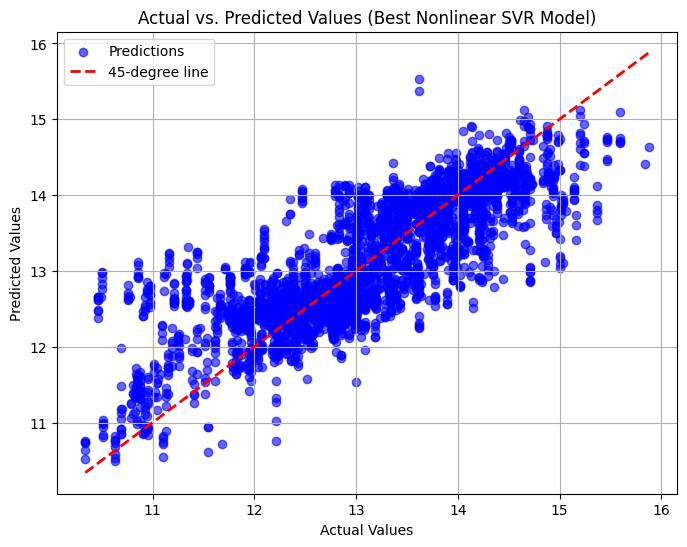

In [23]:
best_comb_NLSVR = hw6.nonlinear_SVR(x_train,x_test,y_train,y_test)

Fig.4: Actual vs Predicted C2 concentrations using Nonliinear SVR for the best hyperparameter combinations (c = 20, epsilon = 0.5 gamma = scale)

3.c) Decision Tree Regressor: The parameters chosen were 'max_depth' varying between [3, 5, 10, 20, 50, None], 'min_samples_split' varying between [2, 3, 5, 10, 20] and 'min_samples_leaf' varying between [1, 2, 5, 10]. Better results (R^2 = 0.73) were observed compared to SVR in this case.


Best Hyperparameters:
max_depth=10, min_samples_split=2, min_samples_leaf=10
Best MSE=0.2762, Best RMSE=0.5256, Best R²=0.7286


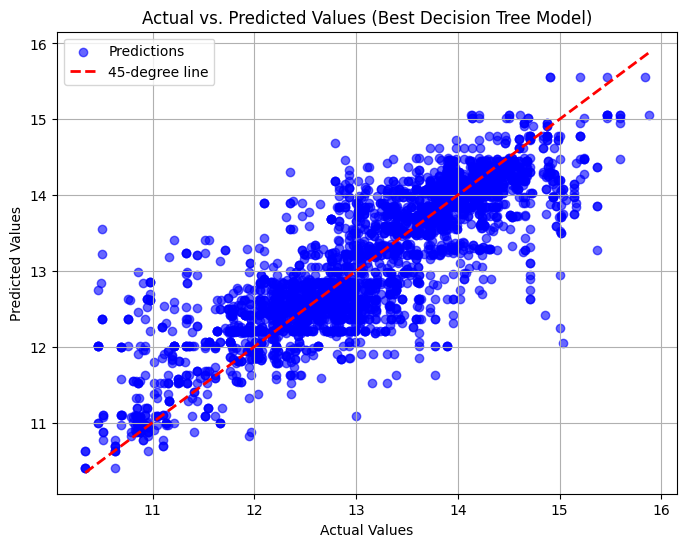

In [29]:
best_comb_DT = hw6.DT_regressor(x_train,x_test,y_train,y_test)

Fig.5: Actual vs Predicted C2 concentrations using Decision tree regressor for the best hyperparameter combinations (max_depth=10, min_samples_split=2, min_samples_leaf=10)

3.d) Random Forest regressor: The hyperparameters chosen were 'n_estimators' within range [50, 100, 200, 500, 1000], 'max_depth' within range [None, 5, 10, 20] and 'min_samples_split' within range [2, 5, 10, 20]. The RF model produced better results than all other models before it (R^2 as 0.75)


Best Hyperparameters:
n_estimators=1000, max_depth=10, min_samples_split=20
Best MSE=0.2542, Best RMSE=0.5042, Best R²=0.7502


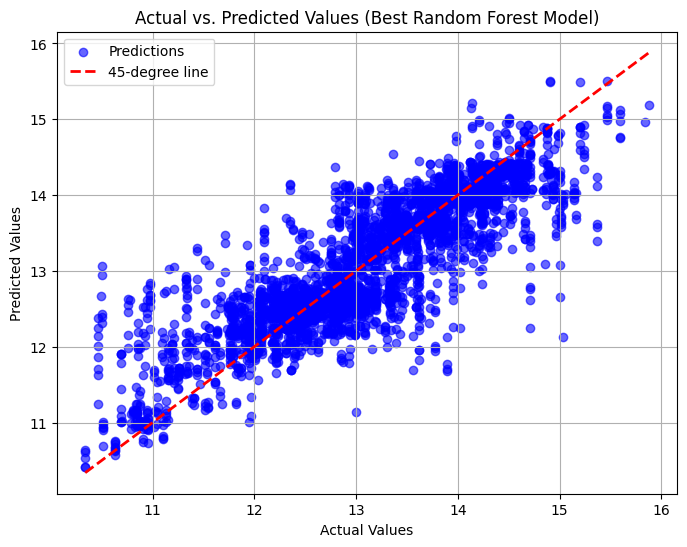

In [31]:
best_comb_RF = hw6.RF_regressor(x_train,x_test,y_train,y_test)

Fig.6: Actual vs Predicted C2 concentrations using Random forest regressor for the best hyperparameter combinations (n_estimators=1000, max_depth=10, min_samples_split=20)

3.e) Gradient Boosting regressor: The hyperparameters chosen were 'learning_rate' ranging [0.01, 0.1, 0.2, 0.5], 'n_estimators' within [100, 200, 300, 500] and 'max_depth' within [3, 5, 7, 10]. Although the results were better than SVR and decision tree, but slightly less than RF.


Best Hyperparameters:
learning_rate=0.1, n_estimators=100, max_depth=5
Best MSE=0.2589, Best RMSE=0.5088, Best R²=0.7457


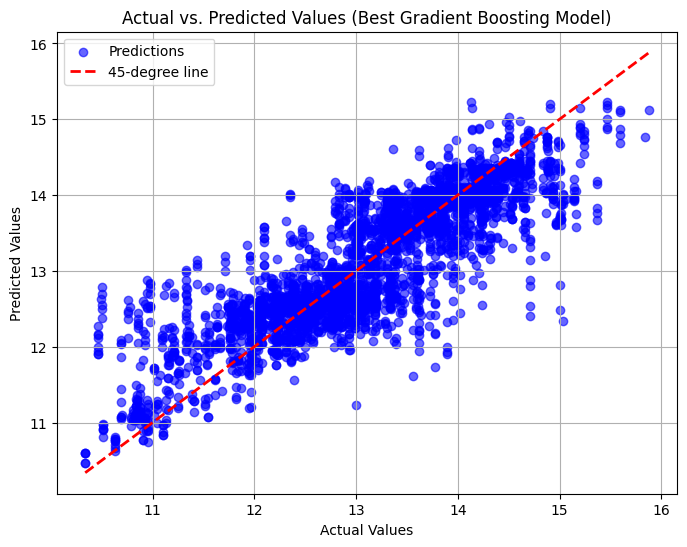

In [32]:
best_comb_GB = hw6.GB_regressor(x_train,x_test,y_train,y_test)

Fig.7: Actual vs Predicted C2 concentrations using Gradient Boosting regressor for the best hyperparameter combinations (learning_rate=0.1, n_estimators=100, max_depth=5)

3.f) Histogram Gradient Boosting: The hyperparameters chosen were 'learning_rate' selected amongst [0.01, 0.1, 0.2], 'max_iter' amongst [100, 200, 300, 500] and 'max_depth' amongst [3, 5, 7, None]. This model produced the best results amongst all models with an R^2 score of 0.751, slightly better than RF model


Best Hyperparameters:
learning_rate=0.01, max_iter=500, max_depth=7
Best MSE=0.2532, Best RMSE=0.5032, Best R²=0.7513


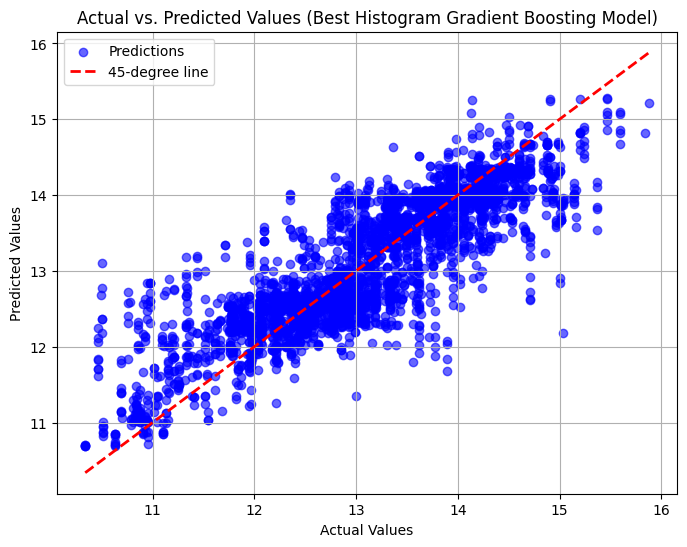

In [34]:
best_comb_HGB = hw6.HGB_regressor(x_train,x_test,y_train,y_test)

Fig.8: Actual vs Predicted C2 concentrations using Histogram based Gradient Boosting regressor for the best hyperparameter combinations (learning_rate=0.01, max_iter=500, max_depth=7)

4.) Out of all models, based on R^2 values, the Histogram based Gradient Boosting performed the best with 0.7513. Using this the following parts are answered.

4.a) Conducing a grid search with cross validation: The hyperparameter ranges thaat were chosen for the grid search are as follows,

i) learning rate = [0.01, 0.1, 0.2, 0.5, 1]
ii) loss = ['squared_error', 'absolute_error', 'gamma', 'poisson']
iii) max_iter = [100, 200, 300, 500]
iv) max_depth = [3, 5, 7, 10, 20]
v) max_features = [0.1, 0.2, 0.5, 1]

Along with it, the number of folds selected were 5.

The reasons for choosing such ranges are as follows. The range of values for learning rate were to ensure gradual convergence and prevent overshooting (for lower values) while speeding up the learning with accuracy compromise (for higher values). Different loss functions are tested to determine the best fit for the dataset. Maximum iterations controlling the number of boosting iterations. lower values (100,200) have early stopping, preventing overfitting while higher values allows the model to learn more complex patterns. Max_depth determines the depth of component within the ensemble. Lower values encourage simpler models that generalize well and reduce overfitting whereas, larger values (i.e. 10,20) can be useful for highly nonlinear relationships but may lead to overfitting. Max_features controls the proportion of features considered for each split. Lower fractions promote feature randomness, reducing overfitting and improving generalization while value of '1' uses all features, which can be beneficial if all features contribute significantly to predictions. Finally a '5' fold validation was chosen to ensure a good trade-off between training time and robustness and also helps avoid overfitting by testing model performance on multiple subsets of the data.

In [8]:
hw6.Gridsearch_CV()

{'estimator__learning_rate': 0.01, 'estimator__loss': 'gamma', 'estimator__max_depth': 10, 'estimator__max_features': 0.2, 'estimator__max_iter': 500}


In [11]:
hw6.cross_validation()

{'fit_time': array([2.04699135, 1.94188929, 2.02884197, 1.92290163, 1.99186301]),
 'score_time': array([0.04397488, 0.04397297, 0.04297614, 0.04197645, 0.04399157]),
 'test_Explained_Variance': array([0.75899872, 0.74136979, 0.74219962, 0.75390338, 0.75130089]),
 'train_Explained_Variance': array([0.78197253, 0.78459969, 0.78639026, 0.78136921, 0.78236437]),
 'test_Max_Error': array([2.16190403, 2.46076454, 2.53476913, 2.7484926 , 2.17834593]),
 'train_Max_Error': array([2.32860653, 2.33361288, 2.1620924 , 2.20142802, 2.29881385]),
 'test_MAE': array([0.36646735, 0.37156414, 0.3668974 , 0.37277742, 0.36886166]),
 'train_MAE': array([0.34693342, 0.34614361, 0.34594513, 0.34673034, 0.34642284]),
 'test_RMSE': array([0.50122631, 0.51586774, 0.50114486, 0.50745022, 0.51027383]),
 'train_RMSE': array([0.4725394 , 0.470453  , 0.47159957, 0.47300185, 0.4717749 ]),
 'test_R2': array([0.75896896, 0.74127931, 0.74209779, 0.75354773, 0.75118859]),
 'train_R2': array([0.78197253, 0.78459969, 0.786

Based on the results, following inferences are drawn:

1) Train and test metrics are close, which suggests the model isn't memorizing the training data excessively.
Small differences (test R² ≈ 0.75 vs. train R² ≈ 0.78) are expected in real-world scenarios.
Stable generalization across folds:

2) Test R², MAE, and RMSE are consistent across all 5 folds—suggesting that the model performs uniformly well on different test sets.
No extreme outlier fold is observed, meaning that data splitting is now balanced.
Max error is slightly high on test data:

3) The max error on test (~2.4) is slightly higher than train (~2.3), indicating occasional poor predictions.
This could be due to outliers or certain edge cases the model struggles with.

4.d) Now with the best set of parameters, the Histogram based GB model was run again on the training and test datasets. The results are shown through 3 performance metrics, RMSE, max error and R^2


TRAIN
RMSE: 0.475
MAX ERROR: 2.358
R2: 0.781

TEST
RMSE: 0.505
MAX ERROR: 2.854
R2: 0.750


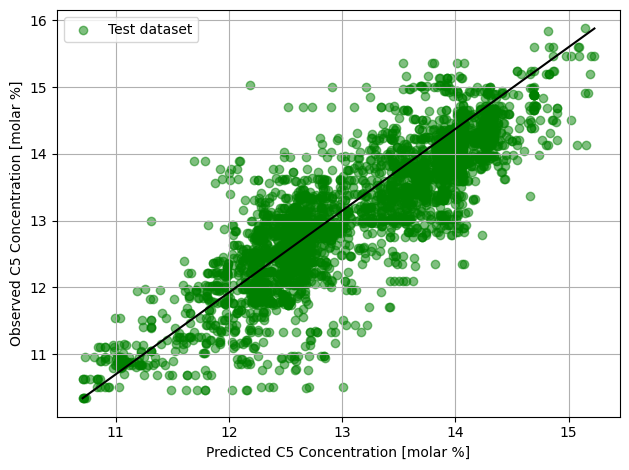

In [12]:
hw6.final_model(x_train,x_test,y_train,y_test)

Fig. 9:Actual vs Predicted C2 concentrations using Histogram based Gradient Boosting regressor for the best hyperparameter combinations ('learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 10, 'max_features': 0.2, 'max_iter': 500) as suggested through grid search and crosss validation.